<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/t06_QM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Quantum Chemistry calculation using CP2K

The aim of this experience is to run some density-functional theory (DFT) calculation. The program we use is cp2k (www.cp2k.org).

The reference lecture is:

https://github.com/carlocamilloni/Structural-Bioinformatics/blob/main/Notes/06_QM_MM_more.pdf

In this type of calculation you first try to find the electronic density and the energy for a configuration of a molecule. The electronic density is what is measured by X-ray crystallography and is the number density of electrons in a system. From the electronic density and the energy, the forces on the nuclei can be calculated and the nuclei can be made to move.

Calculating the electronic density for a single configuration of the nuclei is a relatively expensive task. It's not done directly, but using an iterative procedure, where a random guess for the electronic density is first generated and then iteratively modified until the energy no longer changes.

1) In the first exercise you will calculate the electronic density for a hydrogen atom and learn how to visualise it with VMD.

2) In the second exercise you will calculate the electronic density for a carbon atom and a methane molecule.

3) In the third exercise you will calculate the electronic density and energy for a Na-Cl pair placed at increasing distances.

4) You will simulate an H-transfer reaction in water.

5) You will simulate the density of a small protein.


## SETUP and PRELIMINARY stuff

As usual:


*   Mount google drive
*   Make a folder Task6 for the task
*   Make a copy of this notebook




In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# set the path to your local task folder
local_path='/content/drive/MyDrive/Structural_Bioinformatics/Task6'
%cd {local_path}

In [ ]:
# make a copy of the GitHub structural bioinformatics repository
# this containts usefull input files for runnign the simulatoins
!if [ -d ../sb/ ]; then (rm -rf ../sb); fi
!git clone https://github.com/carlocamilloni/Structural-Bioinformatics.git ../sb --depth 1
%cd {local_path}

In [ ]:
# install cp2k
!apt update
!apt-get install cp2k
%pip install ase pycp2k

# other setup stuff
%env OMP_NUM_THREADS=2

## Hydrogen atom

First make a Task6 subfolder for this simulation, you can name it `hydrogen`.

From the repository (the folder `sb/Data/qm`) copy  the files `H.txt` and `H.pdb` in `Task6/hydrogen`. You can do it either using the file explorer on the left or using the command reported below (check that the folders name are correct)

In [ ]:
%cd {local_path}
%mkdir hydrogen
%cp ../sb/Data/qm/H.txt hydrogen/
%cp ../sb/Data/qm/H.pdb hydrogen/


In [ ]:
%cd {local_path}/hydrogen
%rm -f hydrogen*

"""
This will calculate the energy and the electronic density of an hydrongen atom
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "hydrogen"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("H.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

In [ ]:
!echo $OMP_NUM_THREADS
# after running the calculation you can see the output files in you folder:
%ls
# hydrogen.inp is your input
# hydrogen.out is the output text from the program
# hydrogen-RESTART.wfn is a restart file
# The files .cube have the data about the final electron density.


In [ ]:
# to see the output file you can double click on hydrogen.out or run
%cat hydrogen.out

In the log you can see a lot of information. In particular after some initial comments you should see something like this: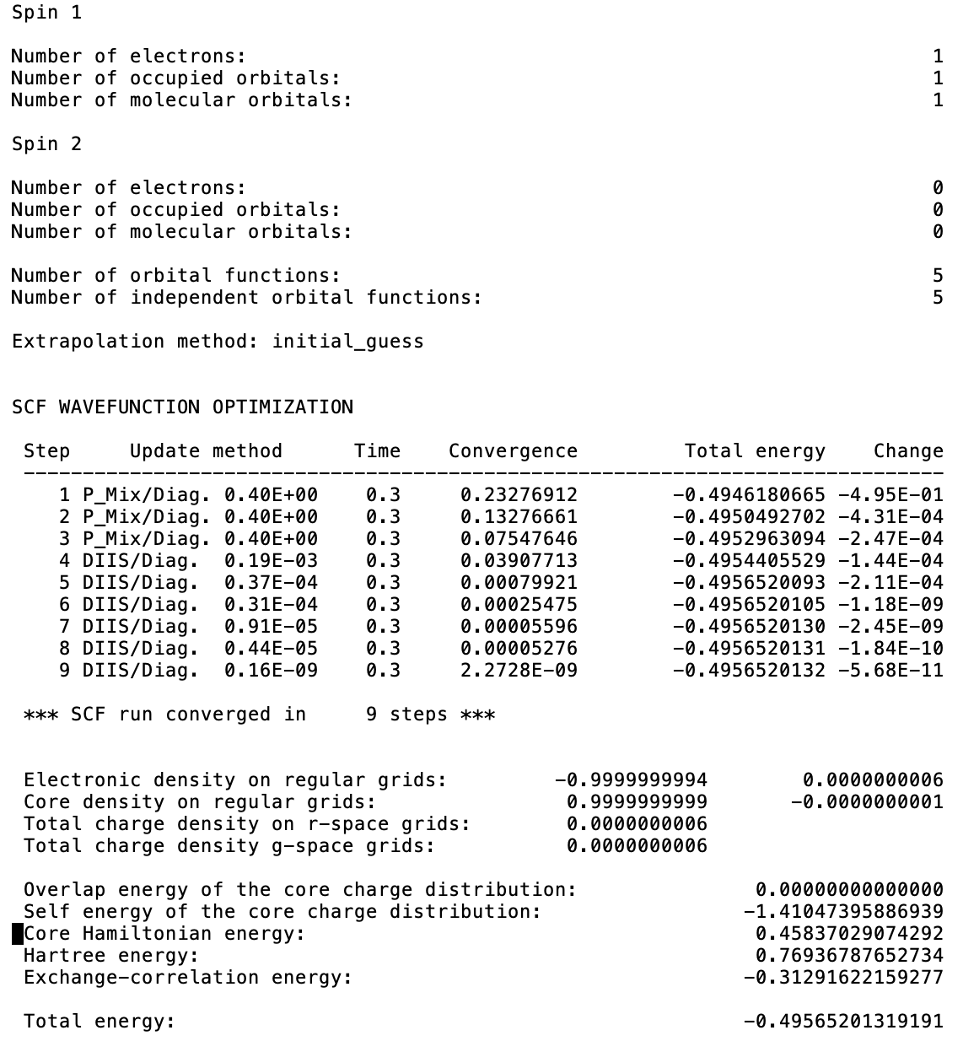

This is telling that there is one electron with spin 1 (we can think about it as spin up) and 0 electron with spin 2 (e.g. spin down). There is an initial guess of the density of this electron. That is the probability of finding the electron in the box. This initial density is then optimized until the density and the corresponding energy don’t change anymore (you see that after around 9 iteration of the code the difference between two consecutive iterations (Change) is going to smaller and smaller numbers. After that it checks that the electronic density is actually -1 (the charge of the electron is negative) and it reports the total energy -0.497 Hartree (or A.U., atomic unit) 1 Hartree = 27.211 eV (electron Volt)


You can also print the content of the input file hydrogen.inp:


In [ ]:
%cat H.txt

We are using a box ABC that is cubic with side 5 Angstrom, we are placing there an hydrogen atom whose coordinates are in the file H.pdb.

We are using a exchange and correlation (XC) potential named PBE

We are using a BASIS SET named DZVP-GTH-PBE

We are using a PSEUDOPOTENTIAL for our hydrogen electron that is called GTH-PBE-q1

Now we can visualise the DENSITY with VMD. Copy the density file on the workstation
hydrogen-ELECTRON_DENSITY-1_0.cube (the SPIN density and the ELECTRON density in this case are equivalent because there is one single electron). VMD can open the cube format.

The isosurface representation allows visualising regions of different density, so you can see where the density is higher and lower. The integral of the density in the box will be 1. The possible range of value is given by Range (min, max)


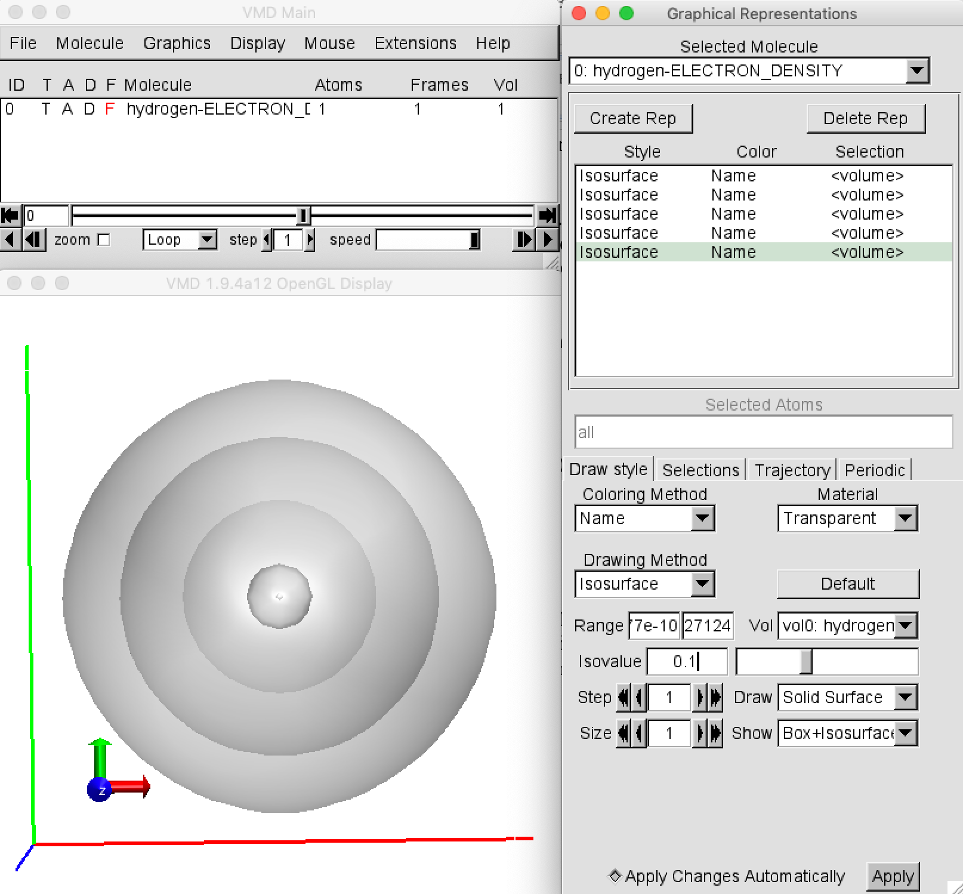

Try the following representations:

1.	Isosurface, Draw: solid surface, isovalue 0.25 (a very high value)
2.	Isosurface, Draw: solid surface, Material: transparent, isovalue 0.1
3.	The same decreasing isovalue to 0.01
4.	..


You can see that the electron density is larger than 0 even at 2.5 angstrom from the nucleus (the box is 5 angstrom large). This means that there is a small chance that the electron can be relatively far from its nucleus.


## Carbon atom

As before, first make a Task6 subfolder for this simulation, you can name it `carbon`.

From the repository (the folder `sb/Data/qm`) copy the files `C.txt` and `C.pdb` in `Task6/carbon`. You can do it either using the file explorer on the left or using the command reported below (check that the folders name are correct)

In [ ]:
%cd {local_path}
%mkdir carbon
%cp ../sb/Data/qm/C.pdb carbon/
%cp ../sb/Data/qm/C.txt carbon/

In [ ]:
%cd {local_path}/carbon
%rm -f carbon*

"""
This will calculate the energy and the electronic density of a carbon atom
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "carbon"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("C.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

Here in principle we are simulating 6 electrons. In practice, to speed up the calculation the core electrons are generally including in the nucleus. This means for example that in the case of carbon the nucleus has a charge of +6 (6 protons) -2 (2 core electron is 1S) = +4. So, the simulation will only calculate the 4 valence electrons.

We have 4 valence electrons, in the textbook representation:
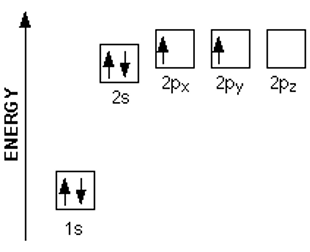

You can visualise the density as before (now the box is a bit larger, 6 angstrom). This time, if you look at the density for large isovalue you can see that there are two concentric spheres. This because there is some empty-space that should be occupied by the two core electrons. You can also open together the carbon and the hydrogen and make some comparison (use different colors for the two). For the same isovalue (that is the same probability surface) the occupied space is different, indeed in the carbon atom there are more electrons that can be found.

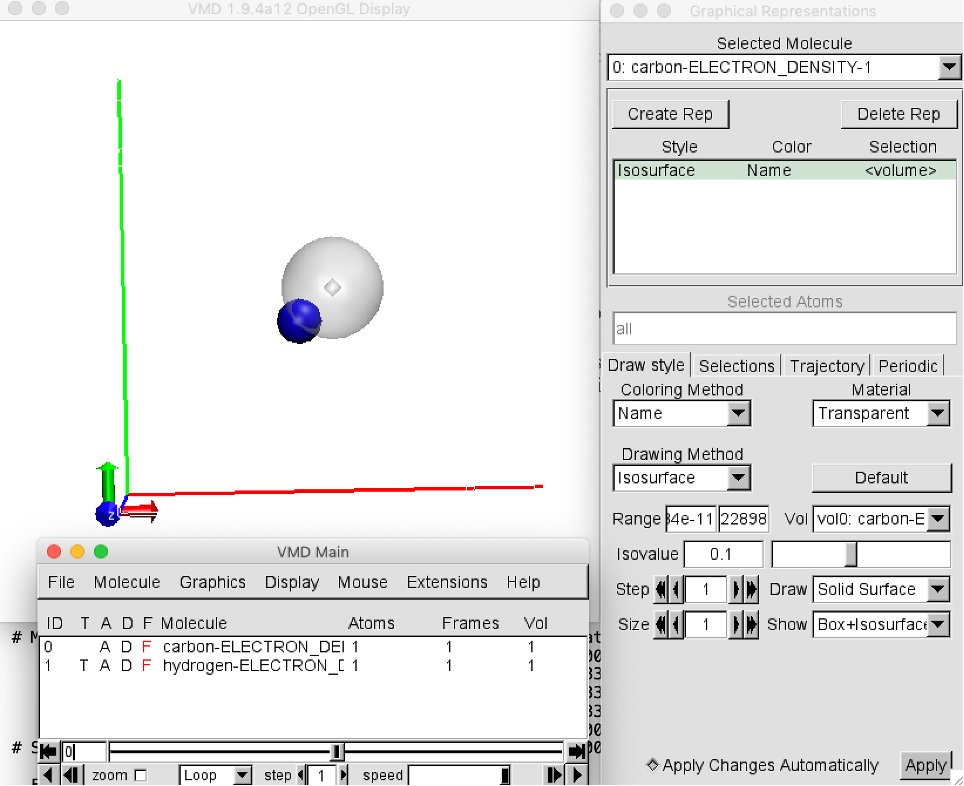

## Methane

As before, first make a Task6 subfolder for this simulation, you can name it `methane`.

From the repository (the folder `sb/Data/qm`) copy the files `CH4.txt` and `CH4.pdb` in `Task6/methane`. You can do it either using the file explorer on the left or using the command reported below (check that the folders name are correct)

In [ ]:
%cd {local_path}
%mkdir methane
%cp ../sb/Data/qm/CH4.pdb methane/
%cp ../sb/Data/qm/CH4.txt methane/

In [ ]:
%cd {local_path}/methane
%rm -f methane*

"""
This will calculate the energy and the electronic density of a carbon atom
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "methane"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("CH4.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

Even if as you can guess we have now 8 electrons to simulate, this calculation is actually not that slower than the one of the single Carbon, this because this is a “closed shell” calculation, all Molecular Orbitals are occupied and the density is much more stable.

Once the calculation is done, as before copy the Electron density on the workstation and look at it with VMD.

## Ionic bond between NA and CL

In this exercise you will calculate the density and energy of the two atoms from far apart and getting close by. This will allow to calculate the interaction energy of the two atoms.

First make a Task6 subfolder for this simulation, you can name it `nacl`.

Then from the folder `../sb/Data/qm` copy in `nacl` the file `NACL.txt`.


In [ ]:
%cd {local_path}
%mkdir nacl
%cp ../sb/Data/qm/NACL.txt nacl/

Take a look at the `NACL.txt` file:

In [ ]:
%cd {local_path}/nacl
%cat NACL.txt

In this case the coordinates of the system are written inside the input file NACL.txt, the box side is 16 Ang:


```
    &CELL
      ABC   16.  16.  16.
      PERIODIC NONE
    &END CELL
```





At the beginning the atoms are placed at a distance of 8 angstrom (12-4) along the x direction.

```
    &COORD
       Na   4.000000  8.000000  8.000000
       Cl  12.000000  8.000000  8.000000
    &END COORD
```


Furthermore, to make the calculation more accurate we will be using 9 valence electrons for NA (all the 2p8 + 3s1) and 7 electrons for CL (3s2 + 3p5).

The goal is to run some energy calculations moving the two atoms closer and closer in space, and make a table (in the report) like:

```
DISTANCE - ENERGY
8.0         ...
7.5         ...
6.0         ...
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0
```

Start by running the first simulation (it can take up to 10 minutes):


In [ ]:
%cd {local_path}/nacl

"""
This will calculate the energy and the electronic density of a NA and CL atoms
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "nacl-8"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("NACL.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

To find the energy of the two ions search for Total ENERGY in the nacl-8.out file.

At this point you can change the distance between the two atoms to make them closer. For this you need to modify the `NACL.txt` file. To edit the `NACL.txt` file, go the file explorer on the left of the browser, find the file, select it and double click to edit it. It will open a new page where you can edit it and save it.

Decrease the distance by 0.5 angstrom. Modify only the x coordinate of both atoms to obtain the new desired distance.

    &COORD
       Na   new_x  8.000000  8.000000
       Cl   new_x  8.000000  8.000000
    &END COORD

In the following change also the "project_name=nacl-xx" setting the new distance in place of xx so that your files don't get overwritten

In [ ]:
"""
This will calculate the energy and the electronic density of a NA and CL atoms as a function of their relative distance
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "nacl-7"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("NACL.txt")
calc.run()

Repeat the same operation decreasing the distance until reaching 2 angstrom

## MD of water and Proton Transfer

For now we have only calculated the electronic density given a configuration, this is the starting point to perform dynamics. From the electron density it is possible to calculate the forces on the nuclei and then move them as classical particles. Here our starting configuration is a small box of water with a H3O+ and an OH- and we will see how fast or slow is a proton transfer in water.

First make a Task6 subfolder for this simulation, you can name it `md`. Then copy in `md` from the repository (the folder `sb/Data/qm`) the files `H-transfer.txt` and `H-transfer.pdb`.

In [ ]:
%cd {local_path}
%mkdir md
%cp ../sb/Data/qm/H-transfer.txt md/
%cp ../sb/Data/qm/H-transfer.pdb md/

Now you can run a 50 steps (50 fs) long ab-initio MD:

In [ ]:
%cd {local_path}/md
%rm -f water*

"""
This will calculate the energy and the electronic density of a NA and CL atoms
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "water"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("H-transfer.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

it will take a few minutes… but you should see that after the first step the calculation is faster.
```
By double clicking on the water.out file in the Task6/md folder you can check the status of the calculation.
It does not update automatically, so you need to close it and reopen it.
```

Indeed, the electronic density does not change much at each step so it is then easier to reoptimize it.

After is finished you should have a `water-pos-1.xyz` file. This is the trajectory. You can copy it on the workstation and visualize it with VMD.

Here bonds can be broken so we need a proper visualization. For example, we can use VDW with small spheres. And DYNAMICSBONDS:
We can also add HYDROGENBONDs


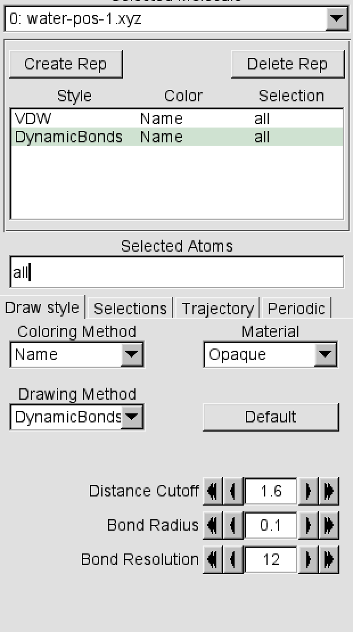

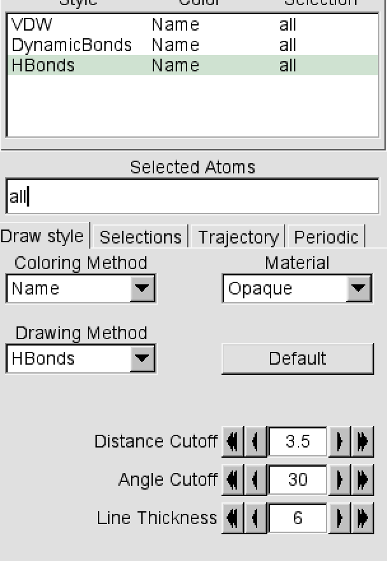

## Electronic density for a small protein

Make a Task6 subfolder for this simulation, you can name it `insulin`. Then copy in `insulin` from the repository (the folder `sb/Data/qm`) the files `insulin.txt`, `insulin.pdb` and `INSULIN-RESTART.wfn`.

In [ ]:
%cd {local_path}
%mkdir insulin
%cp ../sb/Data/qm/insulin.txt insulin/
%cp ../sb/Data/qm/insulin.pdb insulin/
%cp ../sb/Data/qm/INSULIN-RESTART.wfn insulin/

Here we will calculate the electronic density for a single molecule of insulin. For this particular example we will use lower accuracy settings.

run it as usual:


In [ ]:
%cd {local_path}/insulin

"""
This will calculate the energy and the electronic density of a insulin molecule
"""
from pycp2k import CP2K

# The CP2K object is normally initialized
calc = CP2K()
calc.working_directory = "./"
calc.project_name = "insulin"
calc.mpi_n_processes = 2

# This function tries to read the input file in the given path
calc.parse("insulin.txt")

# The calculation can be modified and run after reading the input file
calc.run()
# After you have run

Once the calculation is done it is possible to visualize the electron density in VMD. This is what one gets from X-Ray scattering in the case of crystals.